In [1]:
import pandas as pd
import numpy as np
import talib as ta
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy.signal import argrelextrema, find_peaks_cwt
import json
from bs4 import BeautifulSoup
import requests 
import urllib.request
import datetime
from datetime import timedelta, datetime
import time
from scipy import signal
diretorio= os.getcwd()
diretorio

'/Users/igoracmorais/igor/Wise&Trust/CPM_trading2/Trading/Rotines/Python'

In [35]:
data=pd.read_csv(diretorio+"/btc.csv",sep=";",index_col="datetime")

In [36]:
def bop(data,time=[]):
    data["bop"]=ta.BOP(data.open, data.high, data.low, data.close)
    for t in time:
        data["bop_"+str(t)]=ta.EMA(data.bop,timeperiod=t)
    return data

In [46]:
# Candlestick graph
def candle_graph_bop(data,nome_coluna_datas="datetime",n=200,linha1="bop",**colunas):
    ohlc=data.reset_index()[-n:]
    ohlc[nome_coluna_datas]=pd.to_datetime(ohlc[nome_coluna_datas])
    ohlc[nome_coluna_datas]=ohlc[nome_coluna_datas].apply(mdates.date2num)
    #
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(6,8)) 
    ax1 = plt.subplot2grid((6,1), (0, 0),rowspan=3)
    ax2 = plt.subplot2grid((6,1), (3, 0),rowspan=2)
    ax1.axes.get_xaxis().set_visible(False)
    candlestick_ohlc(ax1, ohlc.values, width=.6, colorup='green', colordown='red')
    #
    ax2.plot(ohlc[nome_coluna_datas], ohlc[linha1], color = 'green', lw=1,label=linha1)
    for key,value in colunas.items():
        ax2.plot(ohlc[nome_coluna_datas], ohlc[value], color = 'blue', lw=1)
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    import matplotlib.ticker as ticker
    ax2.xaxis.set_major_locator(ticker.MaxNLocator(10))
    plt.xticks(fontsize=8)
    ax2.legend(loc=1,fontsize=8)
    return plt.show()

## Exemplo:

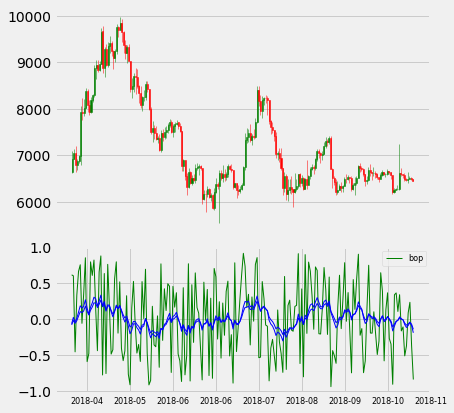

In [66]:
df=bop(data,time=[7,14,21])
candle_graph_bop(df,linha=["bop_14","bop_21"])

In [67]:
def turning_point(data,coluna=[],ordem=3):
    for coluna in coluna:
        data[coluna+'_min'] = data.iloc[argrelextrema(data[coluna].values, 
                                                  np.less_equal, order=ordem)[0]][coluna]
        data[coluna+'_max'] = data.iloc[argrelextrema(data[coluna].values, 
                                                  np.greater_equal, order=ordem)[0]][coluna]
        data[coluna+'_min'].fillna(0,inplace=True)
        data[coluna+'_max'].fillna(0,inplace=True)
        data["tp_"+coluna]=0
        data.loc[data[coluna+'_min']>0,"tp_"+coluna]=1
        data.loc[data[coluna+'_max']>0,"tp_"+coluna]=-1
        data[[coluna+'_min',coluna+'_max']]=np.nan
        data.drop([coluna+'_min',coluna+'_max'],axis=1,inplace=True)
    return data

In [68]:
def graph_signal(data,coluna1,coluna2):
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(6,8)) 
    ax1 = plt.subplot2grid((6,1), (0, 0),rowspan=3)
    x_axis = data.index.get_level_values(0)
    ema1,=ax1.plot(x_axis, data[coluna1],color='black', lw=1)
    ax1.axes.get_xaxis().set_visible(False)
    # signals turning points
    v_pr=data.loc[data[coluna2]<0]
    c_pr=data.loc[data[coluna2]>0]
    ax1.plot(v_pr.index, data.loc[v_pr.index][coluna1], 'v', markersize=6, color='r')
    ax1.plot(c_pr.index, data.loc[c_pr.index][coluna1], '^', markersize=6, color='b')
    # signal trend
    data["tp_"+coluna2]=0
    data.loc[data[coluna2]>0,"tp_"+coluna2]=1
    data.loc[data[coluna2]>0,"tp_"+coluna2]=-1
    return plt.show()

/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:73: RuntimeWarning: invalid value encountered in less_equal
  results &= comparator(main, plus)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:74: RuntimeWarning: invalid value encountered in less_equal
  results &= comparator(main, minus)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:73: RuntimeWarning: invalid value encountered in greater_equal
  results &= comparator(main, plus)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:74: RuntimeWarning: invalid value encountered in greater_equal
  results &= comparator(main, minus)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

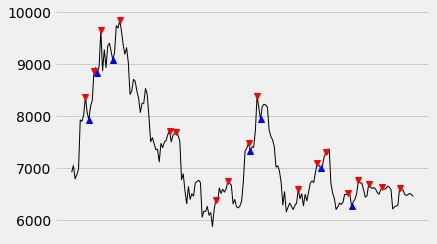

In [69]:
df=turning_point(df,coluna=["bop_7","bop_14","bop_21"])
df2=df[-200:]
graph_signal(df2,coluna1="close",coluna2="tp_bop_21")